In [1]:
# Import Libraries and Dependencies
from vilib.matrix_games.base import mg_problem
from vilib.matrix_games.generate import*
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import numpy.linalg as LA
from solvers import *

In [2]:
dimN = 30
dimM = 30
proximal_name = "simplex"

prob = mg_problem("rand", proximal_name, (dimN, dimM), "plusuniform")
#filepaths = ["test.h5", "testT.h5", False]
#prob = mg_problem("harddisk", proximal_name, (dimN, dimM))
F_mg, J_mg, prox_g_mg = prob.get_parameters()

In [3]:
N = 30000
show_out = False
# starting point
q0 = prox_g_mg(np.ones(dimN + dimM),1)

In [4]:
ans0 = adaptive_graal(J_mg, F_mg, prox_g_mg, q0, N, phi=1.5, output=show_out)[0]

CPU time for aGRAAL: 3.5656530999999996


In [5]:
ans1 = extra_gradient_method(J_mg, F_mg, prox_g_mg, q0, N, show_out)[0]

CPU time for Extra Gradient: 5.6332668


In [6]:
ans2 = tseng_fbf_linesearch(J_mg, F_mg, prox_g_mg, q0, 2, N)[0]

CPU time for FBF: 9.9359199


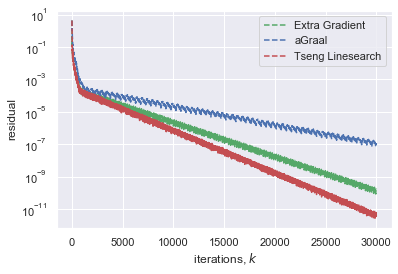

In [7]:
import seaborn as sns
sns.set()
plt.plot(ans1, '--g', label='Extra Gradient')
plt.plot(ans0, '--b', label='aGraal')
plt.plot(ans2, '--r', label='Tseng Linesearch')

plt.legend(loc="upper right")

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

plt.show()